# Проект 2. EDA  

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.
И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы. Чтобы определиться с параметрами будущей модели, проведем разведывательный анализ данных и подготовим отчёт по его результатам.

## Основные цели EDA:
-	Сформулировать предположения и гипотезы для дальнейшего построения модели.
-	Проверить качество данных и очистить их, если это необходимо.
-	Определиться с параметрами модели.

## Краткая информация о данных:
- school — аббревиатура школы, в которой учится ученик
- sex — пол ученика ('F' - женский, 'M' - мужской)
- age — возраст ученика (от 15 до 22)
- address — тип адреса ученика ('U' - городской, 'R' - за городом)
- famsize — размер семьи('LE3' <= 3, 'GT3' >3)
- Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
- Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
- Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
- Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
- Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
- reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
- guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
- traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
- studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
- failures — количество внеучебных неудач (n, если 1<=n<3, иначе 0)
- schoolsup — дополнительная образовательная поддержка (yes или no)
- famsup — семейная образовательная поддержка (yes или no)
- paid — дополнительные платные занятия по математике (yes или no)
- activities — дополнительные внеучебные занятия (yes или no)
- nursery — посещал детский сад (yes или no)
- higher — хочет получить высшее образование (yes или no)
- internet — наличие интернета дома (yes или no)
- romantic — в романтических отношениях (yes или no)
- famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
- freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
- goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
- health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
- absences — количество пропущенных занятий
- score — баллы по госэкзамену по математике



## Этапы работы над проектом:
1.	Посмотреть на данные.
2.	Проверить данные на пустые значения.
3.	Проверить данные на дублированные/полностью скоррелированные значения.
4.	Проверить данные на наличие выбросов.
5.	Отобрать данные, пригодные для дальнейшего построения модели.
6.	Снова и снова возвращаться к предыдущим пунктам, пока модель не заработает как надо.

## Рекомендации по выполнению проекта
1.	Проведите первичную обработку данных. Так как данных много, стоит написать функции, которые можно применять к столбцам определённого типа.
2.	Посмотрите на распределение признака для числовых переменных, устраните выбросы.
3.	Оцените количество уникальных значений для номинативных переменных.
4.	По необходимости преобразуйте данные
5.	Проведите корреляционный анализ количественных переменных
6.	Отберите не коррелирующие переменные.
7.	Проанализируйте номинативные переменные и устраните те, которые не влияют на предсказываемую величину (в нашем случае — на переменную score).
8.	Не забудьте сформулировать выводы относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели.



In [346]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

%matplotlib inline

In [347]:
pd.set_option('display.max_rows', 35)  # выведем больше строк
pd.set_option('display.max_columns', 35)  # выведем больше колонок
data = pd.read_csv('stud_math.csv')

In [348]:
data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [349]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

In [350]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all'

In [351]:
data.describe()
data.describe(include=['object'])

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,378,368,350,376,359,378,364,386,356,355,381,379,375,361,364
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,295,261,314,133,197,137,250,335,219,200,195,300,356,305,240


# Первичный осмотр данных
Рассмотрим, какие данные хранятся в файле и какие типы данных у столбцов. 

 Датасет содержит 395 строк и 30 столбцов, из них: 
- 13 числовых (int64, float64)
- 17 строковых (object)

Теперь рассмотрим все столбцы по отдельности.

## *school*
аббревиатура школы, в которой учится ученик. 
Категориальные данные, пустых значений нет!


In [353]:
display(pd.DataFrame(data.school.value_counts()))

,school
GP,349
MS,46


В датасете присутвует информация по 2-м школам: 
- GP - 349 ученика
- MS - 46 ученников

Предположу, что для анализа предоставлен небольшой кусок датасета, в который попали всего 2 школы, при чем  первая GP составляет 88% ученников от предложенной выборки.
Признак категориальный (хотя можно посчитать и бинарным, т.к. имеющихся значений всего 2).

 

## *sex*
пол ученика ('F' - женский, 'M' - мужской). 

In [352]:
display(pd.DataFrame(data.sex.value_counts()))

,sex
F,208
M,187


Пустых значений нет - прекрасно, признак бинарный (соответвует описанию).
 Девочек немного больше (53%), чем мальчиков - похоже на правду.
 

## *age*
возраст ученика (от 15 до 22). 


In [354]:
display(pd.DataFrame(data.age.value_counts()))
# data.age.hist(bins=8)
# data.age.describe()

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


Содержит числовые данные, пустых значений нет!.
Заполнен корректно - соответвуют описанию (от 15 до 22).
 Выглядит странно разница в возрасте 8 лет. Я бы задала уточняющие вопросы к исходным данным: 
 - в условиях говорится о госэкзамене по математике в 11 классе? 
 - возраст ученников указан на момент сдачи экзамена?
 
Построим boxplot, чтобы проверить на наличие выбросов 

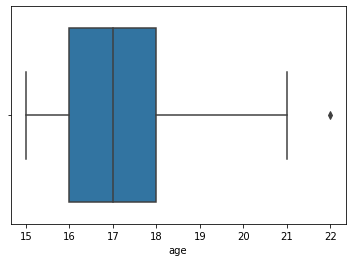

In [344]:
sns.boxplot(data.age)

Из графика видно, что возраст 22 года - является выбросом.
 Для корректности проведем расчет межквартильного размаха и построим гистограмму:

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


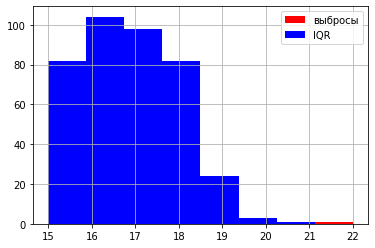

In [345]:
median = data.age.median()
IQR = data.age.quantile(0.75) - data.age.quantile(0.25)
perc25 = data.age.quantile(0.25)
perc75 = data.age.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


data.age.loc[(data.age > (perc75 + 1.5*IQR)) |
             (data.age < (perc25 - 1.5*IQR))].hist(bins=8, range=(15, 22),
                                                   color='red',
                                                   label='выбросы')

data.age.loc[data.age.between(perc25 - 1.5*IQR,
                              perc75 + 1.5*IQR)].hist(bins=8, range=(15, 22),
                                                      color='blue',
                                                      label='IQR')

plt.legend()

Действительно, возраст 22 - является выбросом.

 Удалять пока не будем, подождем, это 1 из 3 столбцов без пропусков.  

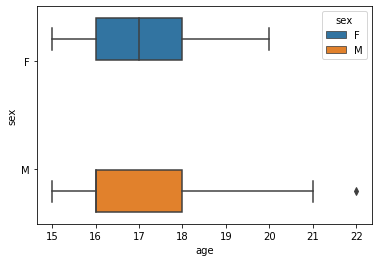

In [66]:
# удалить
sns.boxplot(x='age', y='sex', data=data, hue='sex')

График, построенный в зависимости от пола ученика, показал наибольший разброс по возрасту у мужчин (в т.ч. и выброс 22 года). Возможно это объясниться необходимостью сдать госэкзамен для поступления в ВУЗ, после армии.   

## *address*
адреса ученика ('U' - городской, 'R' - за городом). 
Бинарные данные, object.

 17 пустых значений.


In [56]:
display(pd.DataFrame(data.address.value_counts(dropna=False)))

,address
U,295
R,83
NaN,17


## *famsize*
размер семьи('LE3' <= 3, 'GT3' >3). 
Бинарные данные, object, 

 27 пустых значений.


In [117]:
display(pd.DataFrame(data.famsize.value_counts(dropna=False)))

,famsize
GT3,261
LE3,107
NaN,27


## *Pstatus*
статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно). 
Бинарный признак. Строковые данные. 
 
 Содержит 45 пустых значений.


In [116]:
display(pd.DataFrame(data.Pstatus.value_counts(dropna=False)))

,Pstatus
T,314
NaN,45
A,36


In [152]:
data.pivot_table('sex', index='Pstatus', columns='famsize', aggfunc=['count'],
                 dropna=True, margins=True)

count         
famsize   GT3 LE3  All
Pstatus               
A          20  13   33
T         213  81  294
All       233  94  327

### Комментарии по заполнению пропущенных значений для столбцов famsize и Pstatus

#### Возможные варианты:
1. Заменой модой - наиболее часто встречающимся значением (для famsize - GT3, для Pstatus - T)
2. Случайно заполнить возможными значениями (и/или сохраняя пропорцию распределения) по каждогму столбцу
3. В зависимости друг от друга. Для семей GT3 - наиболее вероятно значение T с вероятностью 92%, для семей Т - наиболее вероятно GT3 с вероятностью 72%


## *Medu*
образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее). 
float64. 

 Категориальный признак.
 Содержит 3 пустых значений (менее 1%).

In [355]:
display(pd.DataFrame(data.Medu.value_counts(dropna=False)))

,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3
NaN,3


count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

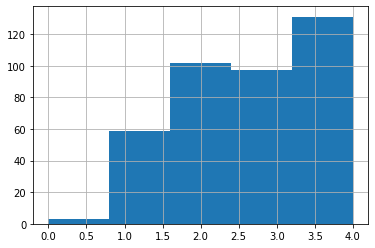

In [103]:
data.Medu.hist(bins=5)
data.Medu.describe()

## *Fedu*
образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее). 
Float64. 

 Категориальный признак. Содержит 24 пустых значений.

In [356]:
display(pd.DataFrame(data.Fedu.value_counts()))

,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


В датасете по столбцу содержится выброс - 40.0
Очевидно, что при внесении данных произошла ошибка, скорее всего опечатка, добавлен лишний 0 - удалим его: 

In [357]:
data.loc[data['Fedu'] == 40.0, 'Fedu'] = 4.0
display(pd.DataFrame(data.Fedu.value_counts(dropna=False)))

,Fedu
2.0,106
3.0,96
4.0,89
1.0,78
NaN,24
0.0,2


count    371.000000
mean       2.517520
std        1.088808
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

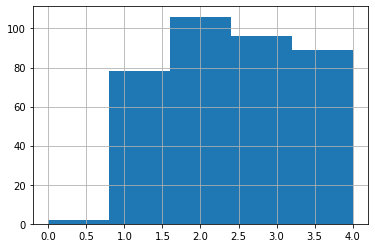

In [157]:
data.Fedu.hist(bins=5)
data.Fedu.describe()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d8bef10>,
      dtype=object)

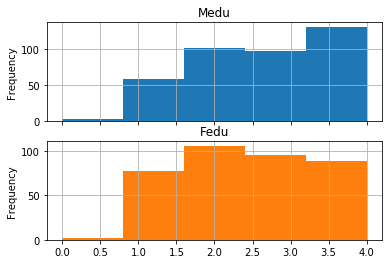

In [159]:
data[['Medu', 'Fedu']].plot(kind='hist',
                            bins=5,
                            grid=True,
                            subplots=True,
                            title=['Medu', 'Fedu'],
                            legend=False)

In [166]:
data.pivot_table('sex', index='Medu', columns='Fedu', aggfunc=['count'], fill_value="",
                 dropna=True, margins=True)

count                        
Fedu   0.0 1.0    2.0 3.0 4.0  All
Medu                              
0.0          1    2.0            3
1.0      1  36   13.0   5   1   56
2.0         27   47.0  17   7   98
3.0         13   25.0  34  18   90
4.0      1       18.0  39  63  121
All      2  77  105.0  95  89  368

### Комментарии по столбцам Medu и Fedu

Сложно представить в современном мире людей без образования (0) или 4 класса (1). Для Medu - 62, для Fedu - 80 - это 15% и 20% соответвенно). 

 Поэтому необходимы уточнения по выборке данных (какие страны/регионы, дата сбора информации, актуальность и тп). 
 
 На данном этапе можно предположить, что у семейных пар схожее образование (т.е. для Medu со значением 1, вероятнее всего и Fedu будет 1 и тд)

## *Mjob*
работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

  Категориальный признак. Содержит 19 пустых значений.
 
 ## *Fjob*
работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

  Категориальный признак. Содержит 36 пустых значений.

In [358]:
display(pd.DataFrame(data.Mjob.value_counts(dropna=False)))
display(pd.DataFrame(data.Fjob.value_counts(dropna=False)))

,Mjob
other,133
services,98
at_home,58
teacher,55
health,32
NaN,19


,Fjob
other,197
services,102
NaN,36
teacher,29
at_home,16
health,15


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e340590>],
      dtype=object)

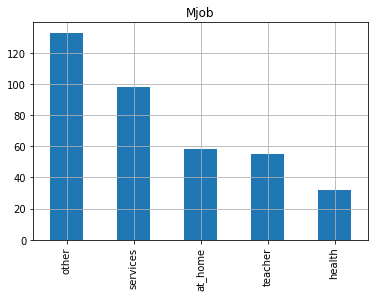

In [179]:
data['Mjob'].value_counts().plot(kind='bar',
                                 grid=True,
                                 subplots=True,
                                 legend=False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e191290>],
      dtype=object)

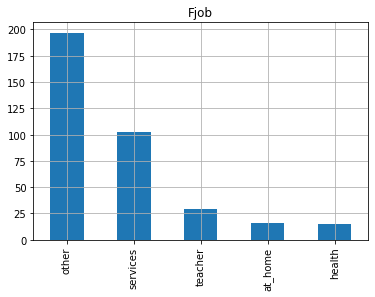

In [196]:
data['Fjob'].value_counts().plot(kind='bar',
                                 grid=True,
                                 subplots=True,
                                 legend=False)

### Комментарии по столбцам Mjob и Fjob

Здравый смысл: У учителей должно быть высшее образование.
Из наблюдений: 95% матерей-учителей имеют высшее образование (4 категория), у остальных - 3 категория. 
У отцов-учителей есть 3 пыстых значения - можно распределить эти пустые согласно доли 95% - категория, остальное 3. 

 Так же предлагаю проверить взаимосвязь образования и работы для Матерей и Отцов. 


## *reason*
причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

 Категориальный признак. Содержит 17 пустых значений.
    

In [359]:
display(pd.DataFrame(data.reason.value_counts(dropna=False)))

,reason
course,137
home,104
reputation,103
other,34
NaN,17


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ea82f10>],
      dtype=object)

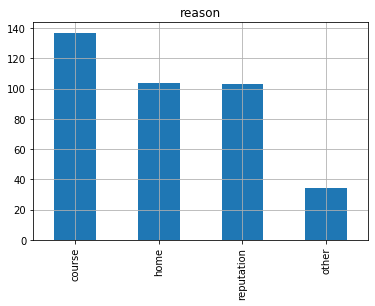

In [202]:
data['reason'].value_counts().plot(kind='bar',
                                   grid=True,
                                   subplots=True,
                                   legend=False)

## *guardian*
опекун ('mother' - мать, 'father' - отец, 'other' - другое)

 Категориальный признак. Содержит 31 пустых значений.
    

,guardian
mother,250
father,86
NaN,31
other,28


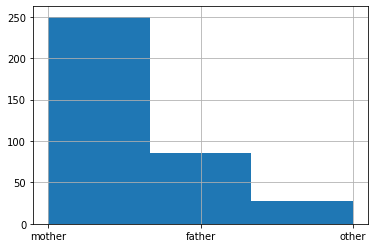

In [207]:
display(pd.DataFrame(data.guardian.value_counts(dropna=False)))
data.guardian.hist(bins=3)

### Комментарии к столбцу guardian

Наибольшее значение - мать - очень предсказуемо. 

Вариант заполнения пустых - самым часто встречающимся или пропорционально.

## *traveltime*
время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

 Категориальный признак. float64. Содержит 367 непустых значений, 28 пустых.
    

In [360]:
display(pd.DataFrame(data.traveltime.value_counts(dropna=False)))
data.traveltime.describe()

,traveltime
1.0,242
2.0,96
NaN,28
3.0,22
4.0,7


count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ef1c2d0>],
      dtype=object)

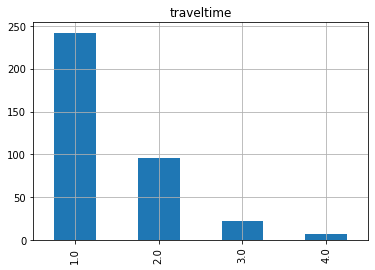

In [209]:
data['traveltime'].value_counts().plot(kind='bar',
                                       grid=True,
                                       subplots=True,
                                       legend=False)

### Комментарии к столбцу traveltime

На первый взгляд:

1. В этих данных и мода и медиана = 1 (самое короткое время - достаточно разумно и логично) - можно предложить пустые заполнить этим значением. 
 
2. Значения 1 и 2 встречаются в более 85% случаях - можно заполнить пустые значения пропорционально этим 2 категориям.
 
Варианты посложнее:
3. Сравнить с address: Для городских жителей время в пути в 90% случаях это категория 1 (большая часть) и 2. Таким образом мы сможем заполнить 18 пустых ячеек. Аналогично для живуших за городом - там распрдееление между тремя категориями.

4. Сопоставить school, address и traveltime. Хотя помним опасения про школы - возмно предложенный датасета - является частью и данные по второй школе неполные и тогда этот пункт некорректно рассматривать.

5. Сравнить с reason (home): вероятно имеется в виду близость к дому (значение 1 и 2 - в данном случае составялют 90%)
  


## *studytime*
время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

 Категориальный признак, float64. Содержит 7 пустых.
    

,studytime
2.0,194
1.0,103
3.0,64
4.0,27
NaN,7


count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

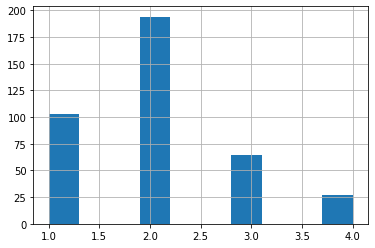

In [361]:
display(pd.DataFrame(data.studytime.value_counts(dropna=False)))
data.studytime.hist()
data.studytime.describe()

### Комментарии к studytime

гистограмма похожа на нормальное распеределение, слега смещенное вправо (скорее всего смещение вызвано неодинаковыми временными интервалами) . 

Пустых значение немного - можно заполнить медианой (она же мода)  - 2

In [369]:
# заполнить модой
data['studytime'] = data['studytime'].fillna(data['studytime'].mode()[0])
display(pd.DataFrame(data.studytime.value_counts(dropna=False)))

,studytime
2.0,201
1.0,103
3.0,64
4.0,27


## *failures*
количество внеучебных неудач (n, если 1<=n<3, иначе 0)

 Категориальный признак, float64. Содержит 22 пустых.
 

,failures
0.0,293
1.0,49
NaN,22
2.0,16
3.0,15


count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

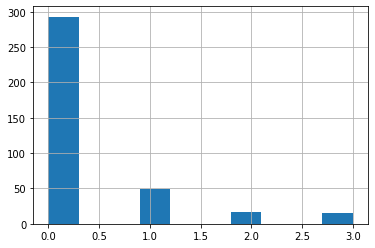

In [364]:
display(pd.DataFrame(data.failures.value_counts(dropna=False)))
data.failures.hist()
data.failures.describe()

### Комментарии к столбцу failures

#### Вопрос:
    Что значит 0? не было неудач и/или было больше 3?
    
    Что значит само понятие внеучебные неудачи? Проигрыш в футбольном матче? (а сколько было выигрышей? за какой период?)
    


## *schoolsup*
дополнительная образовательная поддержка (yes или no)

 Бинарный признак, object. Содержит 9 пустых.
 

In [232]:
display(pd.DataFrame(data.schoolsup.value_counts(dropna=False)))

,schoolsup
no,335
yes,51
NaN,9


## *famsup*
семейная образовательная поддержка (yes или no)

 Бинарный признак, object. Содержит 39 пустых.
 

In [233]:
display(pd.DataFrame(data.famsup.value_counts(dropna=False)))

,famsup
yes,219
no,137
NaN,39


## *paid*
дополнительные платные занятия по математике (yes или no)

 Бинарный признак, object. Содержит 40 пустых.
 

In [234]:
display(pd.DataFrame(data.paid.value_counts(dropna=False)))

,paid
no,200
yes,155
NaN,40


### Комментарии к столбцам schoolsup, famsup , paid

Для начала было бы не плохо понять, что именно подразумевается "образовательной поддержкой", на основании каких данных заполнялись эти столбцы, какие критерии, на сколько объективна иноформациия

1. На первый взгляд эти 3 столбца можно преоброзовать в один Дополнительная образовательная поддержка (yes или no)
2. famsup - можно сравнить с данными о работе родителей (Можно предположить, что учителя-родители более склонны оказать семейную образовательную поддержку)
3. Важно не потерять данные по столбцу paid - поскольку нас интересует результаты экзамена именно по математике и доп.занятия по математике способны улучшить результаты


## *activities*
дополнительные внеучебные занятия (yes или no)

 Бинарный признак, object. Содержит 14 пустых.
 

In [235]:
display(pd.DataFrame(data.activities.value_counts(dropna=False)))

,activities
yes,195
no,186
NaN,14


### Комментарии к столбцам activities

дополнительные внеучебные занятия 

## *nursery*
посещал детский сад (yes или no)

 Бинарный признак, object. Содержит 16 пустых.
 

In [236]:
display(pd.DataFrame(data.nursery.value_counts(dropna=False)))

,nursery
yes,300
no,79
NaN,16


## *studytime, granular*

 ??? признак, float64. Содержит 7 пустых.
 

In [237]:
display(pd.DataFrame(data['studytime, granular'].value_counts(dropna=False)))

,"studytime, granular"
-6.0,194
-3.0,103
-9.0,64
-12.0,27
NaN,7


Повторяет столбец studytime, умноженный на (-3)

  Удалим его, на он не нужен

In [82]:
data.drop(['studytime, granular'], inplace=True, axis=1)

## *higher*
хочет получить высшее образование (yes или no)

 Бинарный признак, object. Содержит 20 пустых.
 

In [238]:
display(pd.DataFrame(data.higher.value_counts(dropna=False)))

,higher
yes,356
NaN,20
no,19


## *internet*
наличие интернета дома (yes или no)

 Бинарный признак, object. Содержит 34 пустых.
 

In [239]:
display(pd.DataFrame(data.internet.value_counts(dropna=False)))

,internet
yes,305
no,56
NaN,34


## *romantic*
в романтических отношениях (yes или no)

 Бинарный признак, object. Содержит 31 пустых.
 

In [240]:
display(pd.DataFrame(data.romantic.value_counts(dropna=False)))

,romantic
no,240
yes,124
NaN,31


## *famrel*
семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

 Категориальный признак, float64. Содержит 27 пустых.
 

In [370]:
display(pd.DataFrame(data.famrel.value_counts(dropna=False)))

,famrel
4.0,182
5.0,99
3.0,62
NaN,27
2.0,17
1.0,8


Некорректное значение -1.0.

 Очевидно, что при внесении данных произошла ошибка, скорее всего опечатка, изменим на 1.0

In [371]:
data.famrel = data.famrel.apply(lambda x: -x if x == -1.0 else x)
display(pd.DataFrame(data.famrel.value_counts(dropna=False)))

,famrel
4.0,182
5.0,99
3.0,62
NaN,27
2.0,17
1.0,8


count    368.000000
mean       3.942935
std        0.903824
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

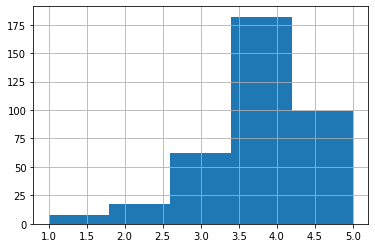

In [109]:
data.famrel.hist(bins=5)
data.famrel.describe()

## *goout*
проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

 Категориальный признак, float64. Содержит 8 пустых.
 

,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23
NaN,8


count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

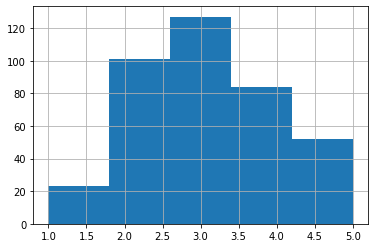

In [244]:
display(pd.DataFrame(data.goout.value_counts(dropna=False)))
data.goout.hist(bins=5)
data.goout.describe()

### Комментарии к столбцу goout

Пустых значении не много - склоняяюсь к заполнению на моду-медиану (3)


In [372]:
# заполнить модой
data['goout'] = data['goout'].fillna(data['goout'].mode()[0])
display(pd.DataFrame(data.goout.value_counts(dropna=False)))

,goout
3.0,135
2.0,101
4.0,84
5.0,52
1.0,23


## *health*
текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

 Категориальный признак, float64. Содержит 15 пустых.
 

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

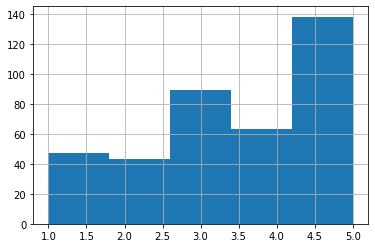

In [111]:
display(pd.DataFrame(data.health.value_counts()))
data.health.hist(bins=5)
data.health.describe()

## *absences*
количество пропущенных занятий

 Числовой, float64. Содержит 12 пустых.
 

In [112]:
display(pd.DataFrame(data.absences.value_counts()))

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


In [290]:
# data.absences.hist(bins=50)
data.absences.describe()

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


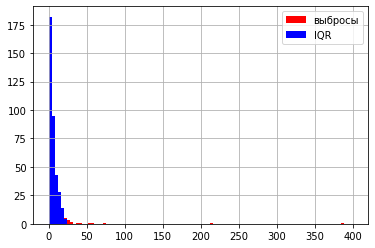

In [293]:
median = data.absences.median()
IQR = data.absences.quantile(0.75) - data.absences.quantile(0.25)
perc25 = data.absences.quantile(0.25)
perc75 = data.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


data.absences.loc[(data.absences > (perc75 + 1.5*IQR)) |
                  (data.absences < (perc25 - 1.5*IQR))].hist(bins=100, range=(0, 400),
                                                             color='red',
                                                             label='выбросы')

data.absences.loc[data.absences.between(perc25 - 1.5*IQR,
                                        perc75 + 1.5*IQR)].hist(bins=100, range=(0, 400),
                                                                color='blue',
                                                                label='IQR')

plt.legend()

In [295]:
display(pd.DataFrame(
    (data[data.absences <= (perc75 + 1.5*IQR)]).absences.value_counts()))
print("Пропущенных занятий более {l}       ".format(l=perc75 + 1.5*IQR),
      len(data[(data.absences > (perc75 + 1.5*IQR)) |
               (data.absences < (perc25 - 1.5*IQR))]), " учеников")

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


Пропущенных занятий более 20.0        17  учеников


### Комментарии к столбцу absences

Можно предположить, что количество пропусков зависит от состояния здоровья (столбцец health) - из-за болезней, из-за спортивных соревнований (activities), времени проведенного вне дома/учебы или романтических отношений (goout, romantic). Но первичный осмотр эту версию не подтверждает.

  Я бы предложила изменить этот столбец в категориальный признак, чтобы облегчить восприятие информации. Мы видим межквартильный размах составляет до 20 пропусковю. Таким образом, возможно выделить следующие категории:
- 1 - (0, 5] пропусков 
- 2 - (5, 10] пропусков 
- 3 - (10, 15] пропусков 
- 4 - (15, 20] пропусков 
- 5 - (20, ] пропусков - более 20 пропусков

Пустые ячейки можно заполнить модой (это 0). В пользу этой версии может еще и говорить при заполнении/переносе данных 0 могли не писать и определенные форматы могли преоброзовать 0 в 'пусто'.

## *score*
баллы по госэкзамену по математике

 Числовой, float64. Содержит 6 пустых.
 

In [296]:
display(pd.DataFrame(data.score.value_counts(dropna=False)))

,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
45.0,27
70.0,27
80.0,16


count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

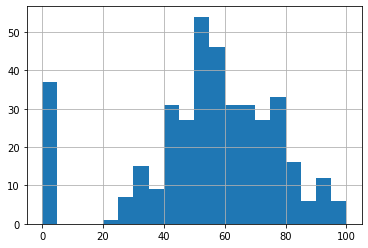

In [117]:
data.score.hist(bins=20)
data.score.describe()

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


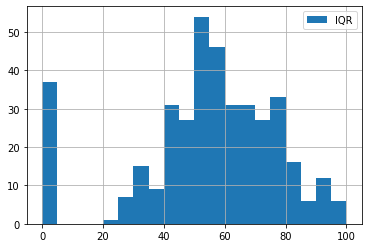

In [289]:
median = data.score.median()
IQR = data.score.quantile(0.75) - data.score.quantile(0.25)
perc25 = data.score.quantile(0.25)
perc75 = data.score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
data.score.loc[data.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=20,
                                                                            range=(0, 100), label='IQR')

plt.legend()

### Комментарии к столбцу score

Смущает значение 0 на экзамене у 37 учеников (потчи 10%).

 Возможно это отсутвие данные (из-за технического переноса 0 = 'пусто'), тогда получается 43 незаполненные ячейки. 
 Возможно в будущей модели необходимо будет смоделировать именно эти данные?
 Проведем дальнейший анализ на данных без нулевых значений по score

count    352.000000
mean      57.755682
std       16.200928
min       20.000000
25%       45.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

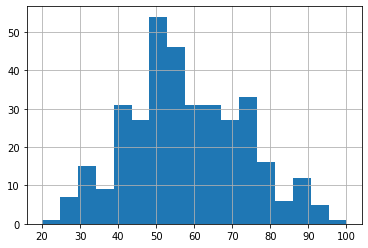

In [326]:
# Построим гистограмму и расчитаем статистические показатели без 0
datas = data[data.score > 0]
datas.score.hist(bins=17)
datas.score.describe()

# Корреляционный анализ



In [331]:
data_num = datas[['age', 'absences', 'score']]

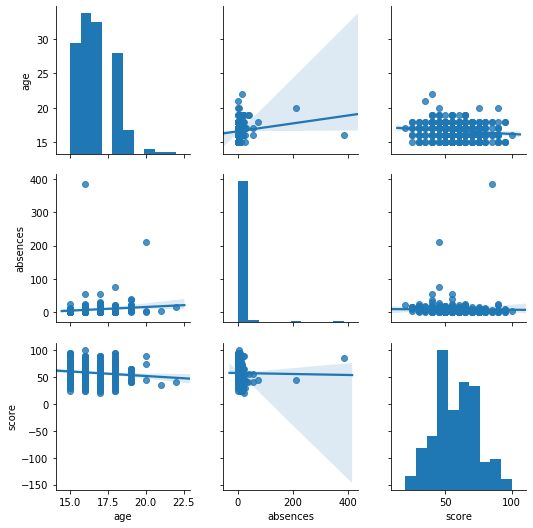

In [332]:
sns.pairplot(data_num, kind='reg')

In [310]:
data_num.corr()

,age,absences,score
age,1.000000,0.093592,-0.155726
absences,0.093592,1.000000,0.065283
score,-0.155726,0.065283,1.000000


### Комментарии 

Оставляем оба критерия, потому что они не сколлерированны между собой. 
Можно сказать, что между возрастом есть обратная корреляция, т.е. чем выше возраст тем ниже score.

# Анализ категориальных переменных¶

Очевидно, что для номинативных переменных использовать корреляционный анализ не получится. Однако можно посмотреть, различаются ли распределения score в зависимости от значения этих переменных. Это можно сделать, например, с помощью box-plot

In [333]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=datas.loc[data.loc[:, column].isin(
                    datas.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

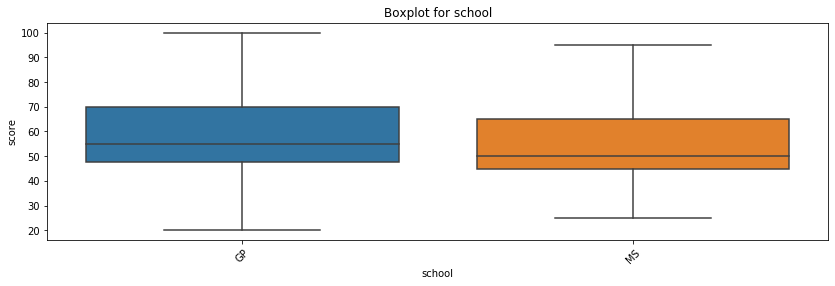

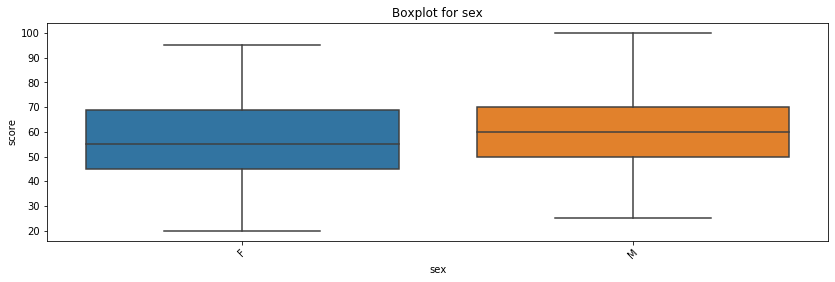

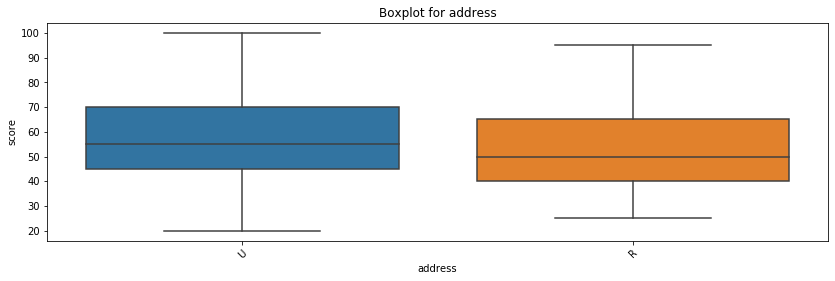

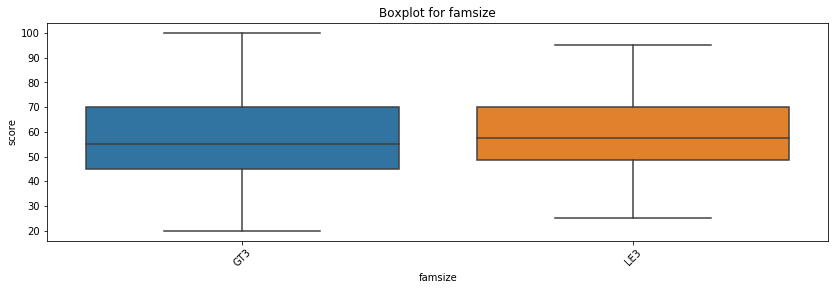

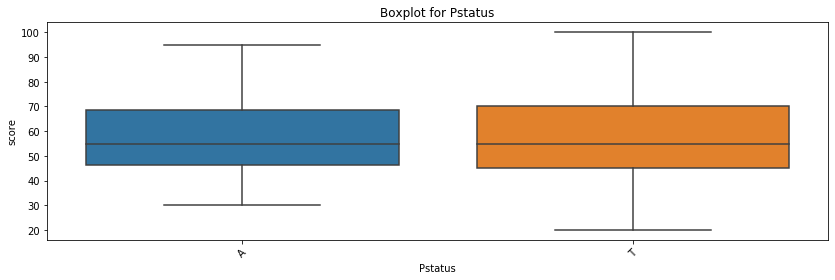

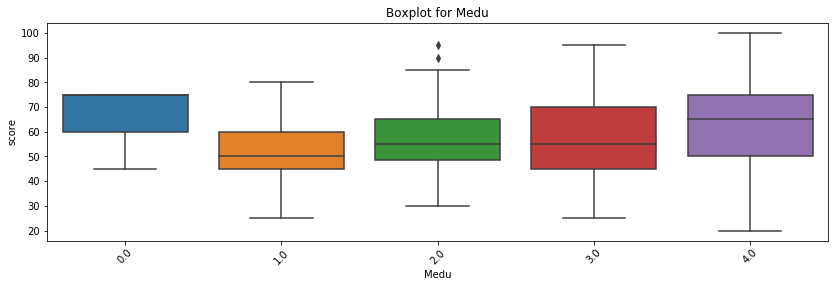

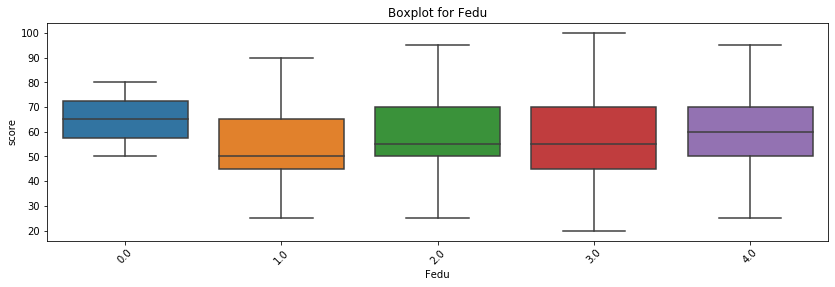

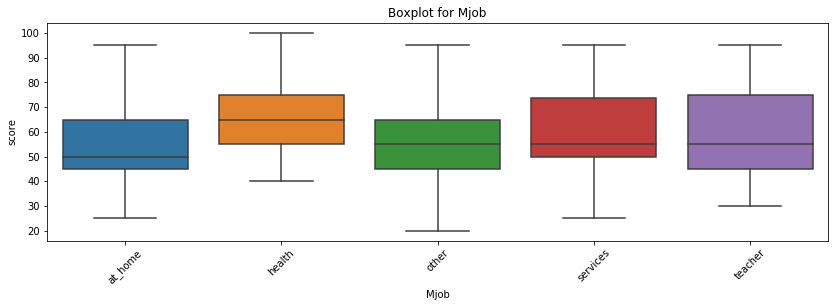

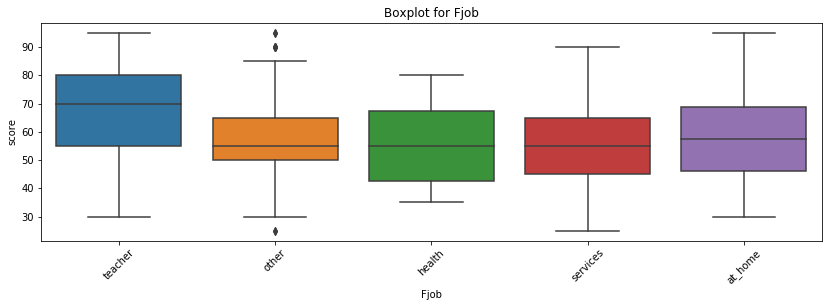

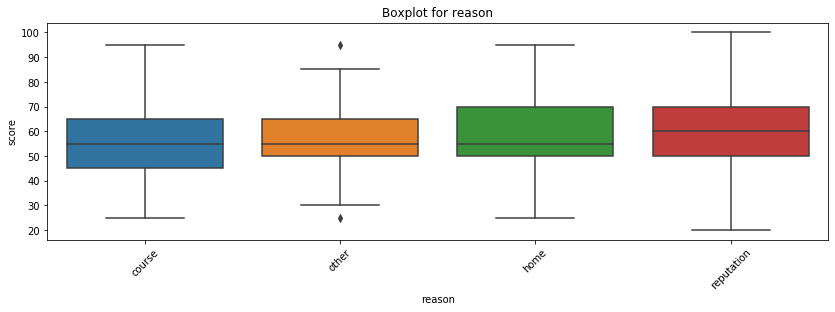

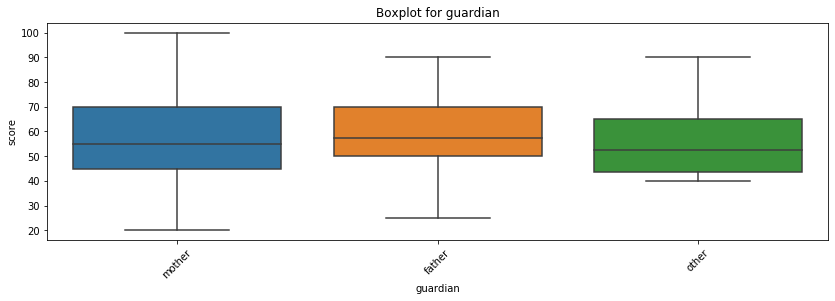

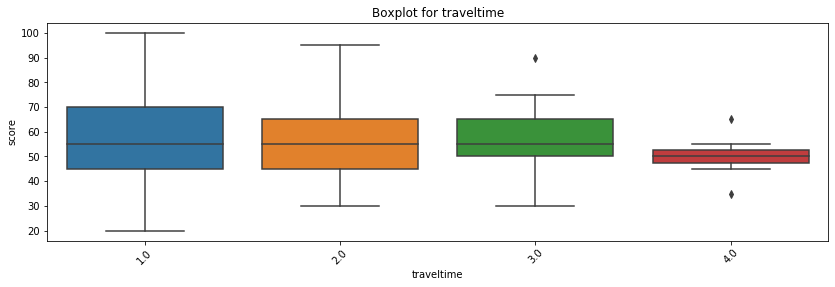

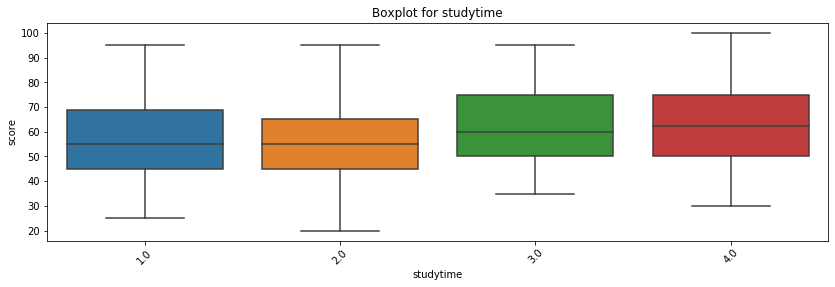

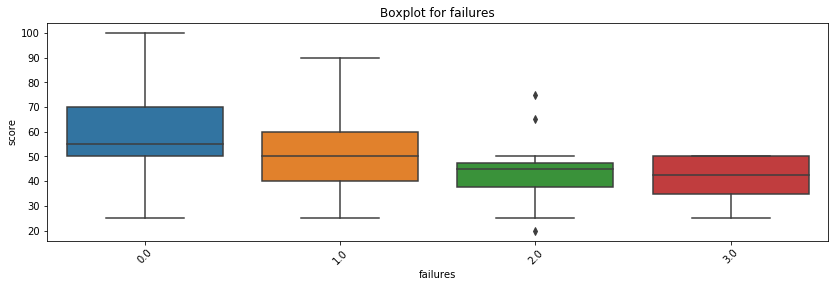

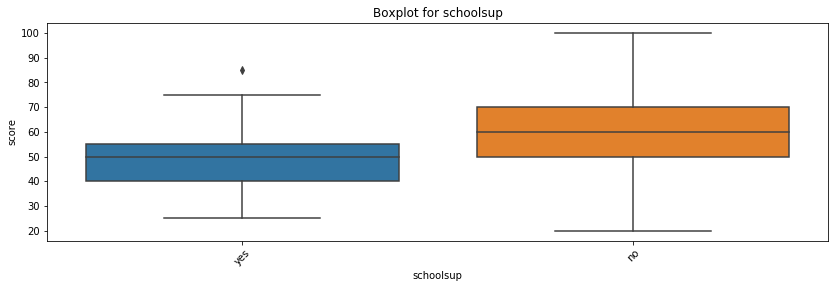

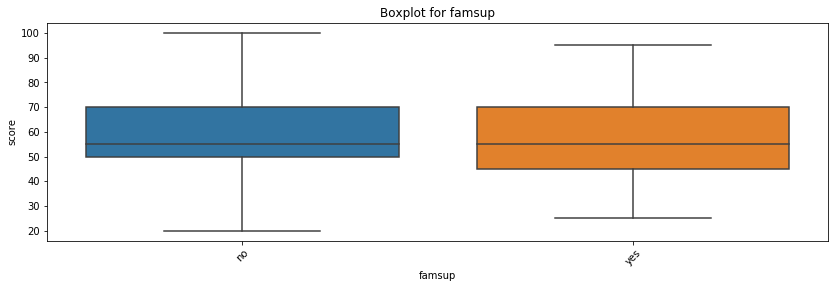

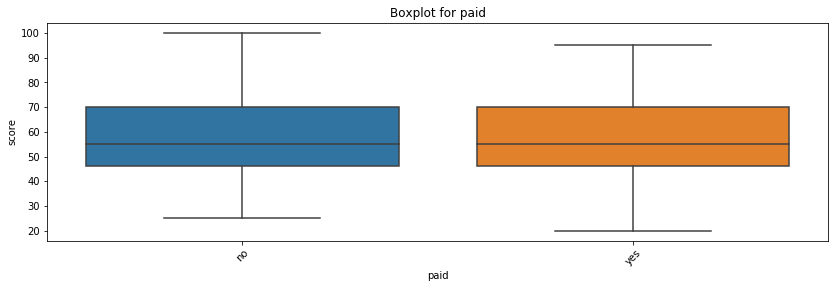

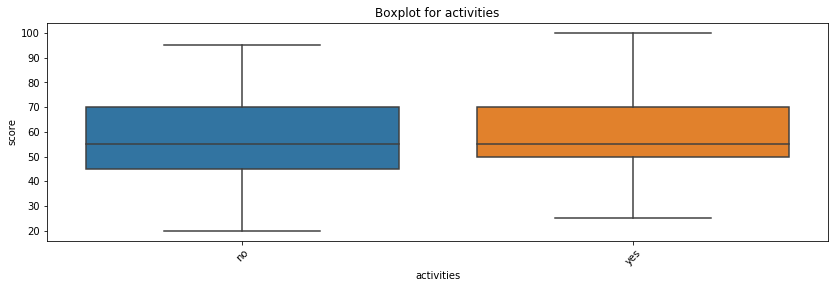

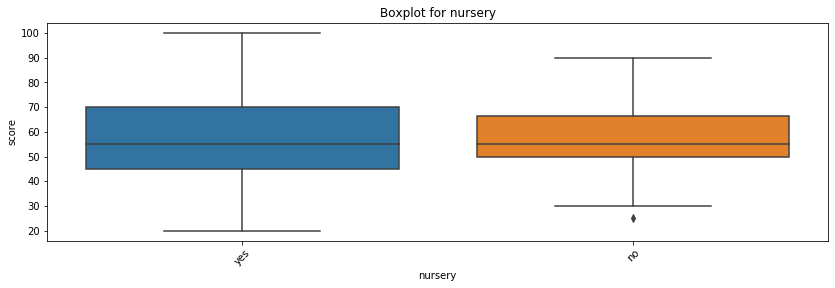

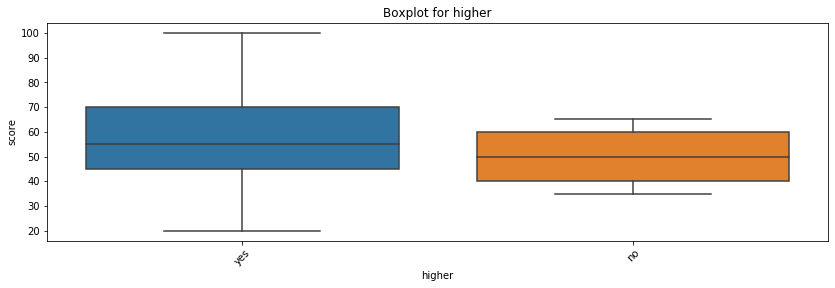

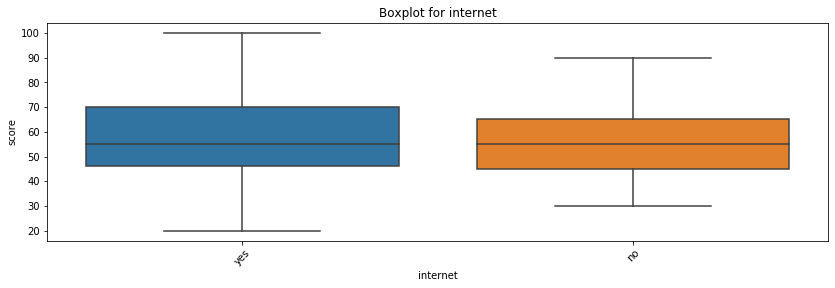

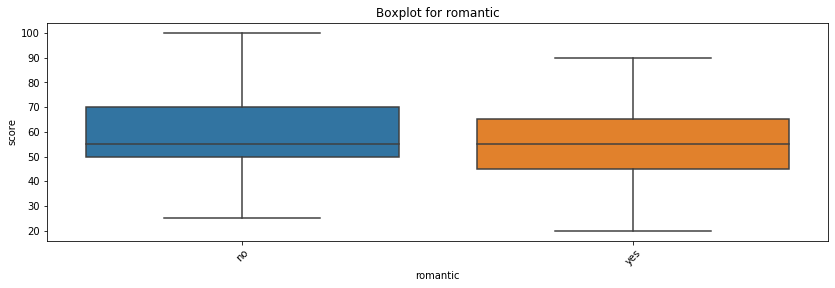

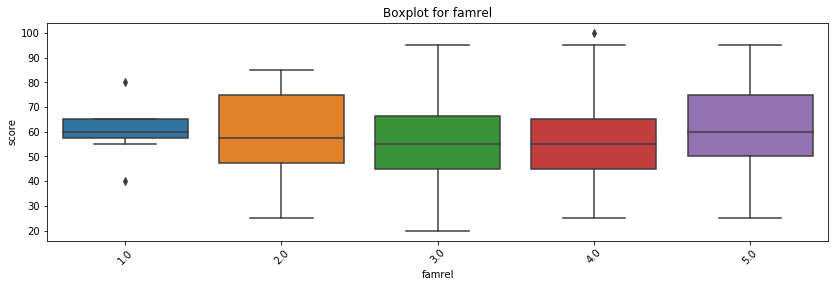

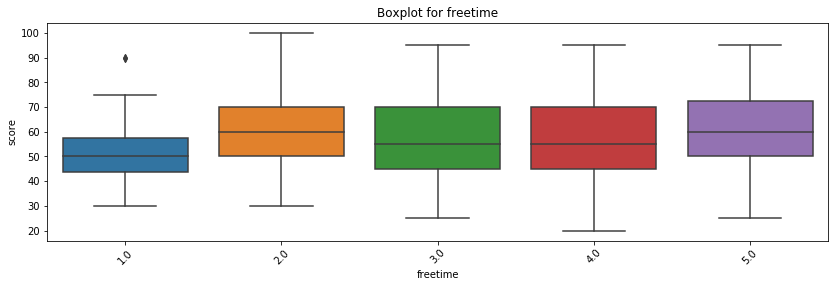

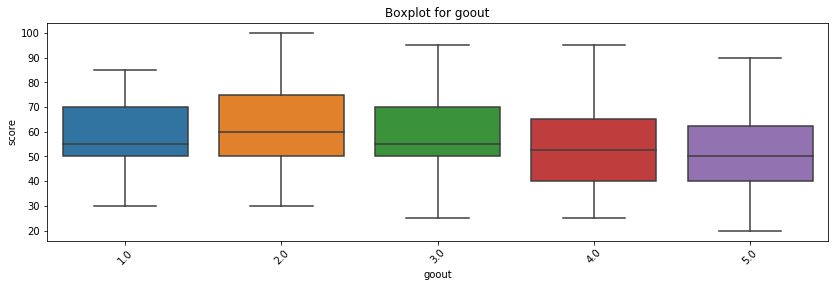

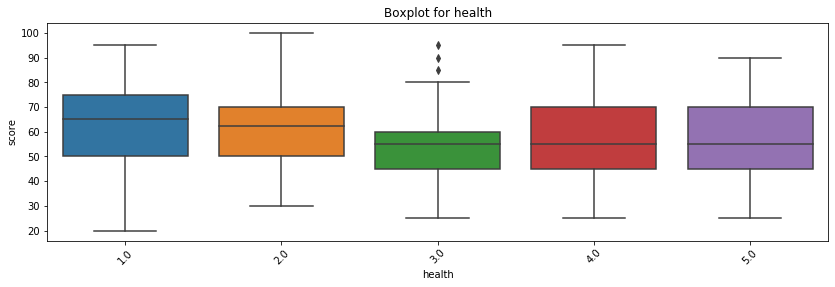

In [334]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
            'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
            'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
            'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
            'health']:
    get_boxplot(col)

По графикам похоже, что могут влиять на результаты score следующие параметры:

- school
- sex
- adress
- Medu
- Fedu
- Mjob
- Fjob
- studytime
- failures
- schoolsup
- activities
- higher
- freetime или goout?
- health

Странно, что в выборку на попал paid - занятия по математике. 

Однако графики являются лишь вспомогательным инструментом, настоящую значимость различий может помочь распознать статистика. Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения оценок батончиков по различным параметрам неразличимы:

In [335]:
def get_stat_dif(column):
    cols = datas.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(datas.loc[datas.loc[:, column] == comb[0], 'score'],
                     datas.loc[datas.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [336]:
for col in ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
            'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
            'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
            'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
            'health', 'absences', 'score']:
    get_stat_dif(col)

/Users/evgeniakulyabina/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3506: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/evgeniakulyabina/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Fedu
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки Fjob
Найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки goout
Найдены статистически значимые различия для колонки score


### Вывод
достаточно отличаются 9 параметров: address, Medu, Fedu, Mjob, Fjob, studytime, failures, schoolsup, goout. Оставим эти переменные в датасете для дальнейшего построения модели.


In [340]:
df_mod = datas.loc[:, ['age', 'address', 'Medu', 'Fedu', 'Mjob', 'Fjob',
                       'studytime', 'failures', 'schoolsup', 'goout', 'score']]

In [341]:
df_mod.info()
df_mod.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 11 columns):
age          352 non-null int64
address      338 non-null object
Medu         350 non-null float64
Fedu         331 non-null float64
Mjob         335 non-null object
Fjob         320 non-null object
studytime    352 non-null float64
failures     332 non-null float64
schoolsup    343 non-null object
goout        346 non-null float64
score        352 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 43.0+ KB


,age,address,Medu,Fedu,Mjob,Fjob,studytime,failures,schoolsup,goout,score
0,18,U,4.0,4.0,at_home,teacher,2.0,0.0,yes,4.0,30.0
1,17,U,1.0,1.0,at_home,other,2.0,0.0,no,3.0,30.0
2,15,U,1.0,1.0,at_home,other,2.0,3.0,yes,2.0,50.0
3,15,U,4.0,2.0,health,NaN,3.0,0.0,no,2.0,75.0
4,16,U,3.0,3.0,other,other,2.0,0.0,no,2.0,50.0


## Выводы
В результате EDA для анализа влияния критериев датасета на модель, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы были получены следующие выводы:

 В данных достаточно много пустых значений, только 3 столбца заполнены полностью (из 29). В некоторых процент пропусков доходит до 11%
 найдены и изменены данные:
- в столбце Fedu (значение 40.0 – скорее все опечатка, заменила на 4.0)
- в столбце famrel (значение -1.0 – скорее все опечатка, заменила на 1.0)
- в столбце score (значение 0.0 удалено, на его основе создан новый булевый критерий no_score)

Столбец studytime, granular – удален 

Пустые значения заменены на моду (медиану) в столбцах:
- studytime
- goout


В столбце score (значение 0.0 предполагаю заполнен ошибочно)

Гипотезы:
- отрицательная корреляция параметра age и score может говорить о том, что чем выше возраст тем ниже score
- отрицательная корреляция параметра failures и score может говорить о том, что чем больше неудач по другим предметам тем ниже score
- отрицательная корреляция параметра goout и score может говорить о том, что чем больше ученик проводит времени с друзьями тем ниже score
- положительная корреляция по парамметру m_edu говорит о том, что чем выше лучше образование матери тем выше score
- положительная корреляция по парамметру f_edu говорит о том, что чем выше лучше образование отца тем выше score

Критерии, которые предлагается использовать в дальнейшем для построения модели 14, это: address, Medu, Fedu, Mjob, Fjob, studytime, failures, schoolsup, goout.